In [1]:
import cv2
from cv2 import cvtColor
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
from skimage.filters import roberts, sobel, scharr, prewitt,gaussian
from skimage.feature import canny
from skimage.filters.rank import entropy
from skimage.morphology import disk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns


%matplotlib inline

In [ ]:
cvtColor(img,cv2.COLOR_B)

In [2]:
df=pd.read_csv('/ddsm_project/data/labels.txt',sep=" ",header=None,names=['fileName','tissues','class','Severity ','X','Y','radius'])

In [4]:
df.drop(df.index[df['fileName'].duplicated()],inplace=True)

In [5]:
df[df['fileName'].duplicated()]

Empty DataFrame
Columns: [fileName, tissues, class, Severity , X, Y, radius]
Index: []

In [ ]:
df.loc[df['fileName']=='mdb313','X']

In [ ]:
df['fileName'][~df['X'].isnull()].to_list()

In [ ]:
for i in df['fileName'][~df['X'].isnull()].to_list():
    img_name=i+'.pgm'
    img=plt.imread(img_name)
    img=img[]

In [ ]:
df['fileName'][df['Severity '].isnull()]

In [ ]:
df['fileName']

In [6]:
normal_names=df['fileName'][df['Severity '].isnull()].to_list()
Benign_names=df['fileName'][df['Severity ']=='B'].to_list()
Malignant_names=df['fileName'][df['Severity ']=='M'].to_list()

In [ ]:
#normal_names.remove('mdb059')
os.chdir('D://ddsm_project/data/')

In [ ]:
#img 167B
#mdb069 B

In [ ]:
os.chdir("/ddsm_project/")

In [ ]:
pwd

In [ ]:
def copyfiles():

    #os.path.isdir('D://ddsm_project/data/normal')

    if os.path.isdir('D://ddsm_project/data/normal') is False:
        
        os.makedirs('D://ddsm_project/data/normal')
        os.makedirs("D://ddsm_project/data/Benign")
        os.makedirs("D://ddsm_project/data/Malignant")
    os.chdir("/ddsm_project/data")
    for i in normal_names:
        name=i+'.pgm'
        shutil.move(name,'D://ddsm_project/data/normal')
        normal_names.remove(i)
    for i in Benign_names:
        name=i+'.pgm'
        shutil.move(name,'D://ddsm_project/data/Benign')
        Benign_names.remove(i)
    for i in Malignant_names:
        name=i+'.pgm'
        shutil.move(name,'D://ddsm_project/data/Malignant')
        Malignant_names.remove(i)





In [ ]:
copyfiles()

In [ ]:
np.ones((3,3))

In [ ]:
def dthresh_morph(img,upper=157,lower=190):
    
    
    filter_size=(7,7)
    width,height=370,631
    x,y=350,376
    #570,631
    #180,376
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,filter_size)
    #Double threshholding
    bw_img = cv2.threshold(img, upper, lower, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)[1]
    bw_img1 = cv2.threshold(bw_img, upper, lower, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)[1] #THRESH_BINARY_INV
    #plt.imshow(bw_img1,cmap='gray')
    masked = cv2.bitwise_and(img, img, mask=bw_img1)
    #Morphological transformation
    
    #morphed=cv2.morphologyEx(masked,cv2.MORPH_ERODE,kernel)
    
    #croping image extracting ROI
    #croped=morphed[y:y+height, x:x+width]
    croped=masked[y:y+height, x:x+width]

    
    #again dilating
    morphed_again=cv2.morphologyEx(croped,cv2.MORPH_OPEN,kernel)
    plt.imshow(morphed_again,cmap='gray')
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#     morphed_again=clahe.apply(morphed_again)
    #plt.imshow(morphed_again,cmap='gray')
#    filtered=entropy(cv2.equalizeHist(morphed_again),disk(1))
#    filtered=np.uint8(filtered)
    #restoring shape
    #black=np.zeros(img.shape,dtype=np.uint8)
    #black[y:y+height, x:x+width]=morphed_again
    
    #plt.imshow(black,cmap='gray')
    
#     fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,20))
#     ax1.imshow(bw_img1,cmap='gray')
    
#     ax2.imshow(morphed,cmap='gray')
    
#     ax3.imshow(croped,cmap='gray')
    
#     ax4.imshow(black,cmap='gray')
    
#     plt.imsave("/ddsm_project/IMGES/morphed3.jpg",morphed,cmap='gray')
#     plt.imsave("/ddsm_project/IMGES/ddtrash3.jpg",bw_img1,cmap='gray')
#     plt.imsave("/ddsm_project/IMGES/croped3.jpg",croped,cmap='gray')
#     plt.imsave("/ddsm_project/IMGES/reshaped3.jpg",black,cmap='gray')
#     plt.imsave("/ddsm_project/IMGES/original3.jpg",img,cmap='gray')
   # plt.imshow(morphed_again,cmap='gray')
    return morphed_again

In [ ]:
def dthresh_morph2(img,upper=157,lower=190):
    
    
    filter_size=(7,7)
    width,height=370,631
    x,y=350,376
    #570,631
    #180,376
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,filter_size)
    #Double threshholding
    bw_img = cv2.threshold(img, upper, lower, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)[1]
    bw_img1 = cv2.threshold(bw_img, upper, lower, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)[1] #THRESH_BINARY_INV
    
    masked = cv2.bitwise_and(img, img, mask=bw_img1)
    #Morphological transformation
    
    morphed=cv2.morphologyEx(masked,cv2.MORPH_ERODE,kernel)
    
    #croping image extracting ROI
    
    croped=morphed[y:y+height, x:x+width]

    
    #again dilating
    morphed_again=cv2.morphologyEx(croped,cv2.MORPH_OPEN,kernel)

    #plt.imshow(morphed_again,cmap='gray')

    return morphed_again

In [ ]:
def dthresh_morph3(img,upper=157,lower=190,x=370,y=631,r=20):
    
    
    filter_size=(4,4)
#     width,height=370,631
#     x,y=350,376
#     #570,631
#     #180,376
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,filter_size)
    bw_img = cv2.threshold(img, upper, lower, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)[1]
    bw_img1 = cv2.threshold(bw_img, upper, lower, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)[1] #THRESH_BINARY_INV
    masked = cv2.bitwise_and(img, img, mask=bw_img1)

    croped=masked[y:y+r*2, x:x+r*2]

    
    #again dilating
    morphed_again=cv2.morphologyEx(croped,cv2.MORPH_OPEN,kernel)

    #plt.imshow(morphed_again,cmap='gray')
    return morphed_again

### Histogram Equalization

In [ ]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,240])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

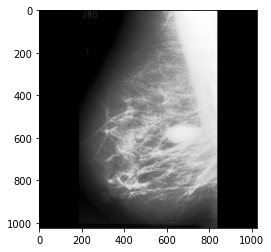

In [430]:
img=plt.imread("data/Benign/mdb025.pgm")
equ = cv2.equalizeHist(img)
plt.imshow(equ,cmap='gray')

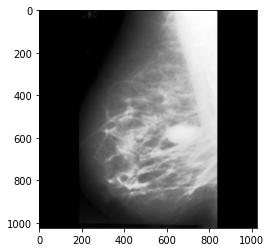

In [431]:
equ=cv2.medianBlur(equ,11)
plt.imshow(equ,cmap='gray')

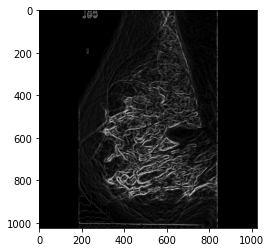

In [432]:
roberts_cross_v = np.array( [[1, 0 ],
                            [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                            [ -1, 0 ]] )
vertical = ndimage.convolve( equ, roberts_cross_v )
horizontal = ndimage.convolve( equ, roberts_cross_h )
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
plt.imshow(edged_img,cmap='gray')

In [ ]:
cv2.medianBlur

In [391]:
img.dtype

dtype('uint8')

In [419]:
edged_img=edged_img.astype(np.uint8)

In [420]:
edged_img.max()

15

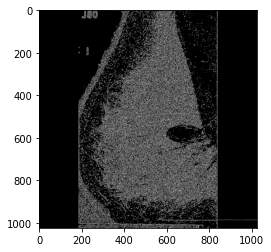

In [402]:
plt.imshow(cv2.Canny(edged_img,10,13),cmap='gray')

In [378]:
edged_img.max()

15

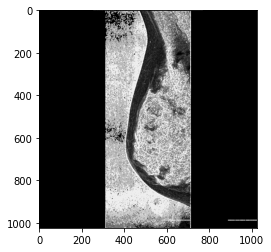

In [379]:
#masked=cv2.threshold(edged_img,5,10,cv2.THRESH_BINARY)[1]
morphed_again=cv2.morphologyEx(edged_img,cv2.MORPH_CROSS,kernel)
plt.imshow(morphed_again,cmap='gray')

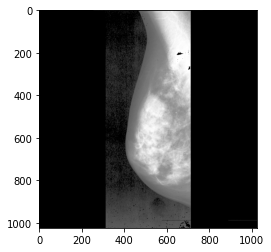

In [384]:
original=cv2.bitwise_and(img,img,mask=morphed_again)
plt.imshow(cv2.equalizeHist(original),cmap='gray')

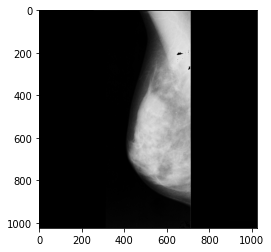

In [383]:
plt.imshow(original,cmap='gray')

## Clean code

C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1494819586.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(5,6))


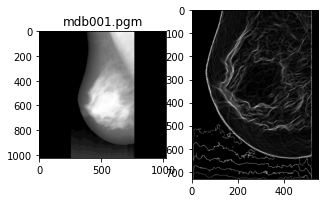

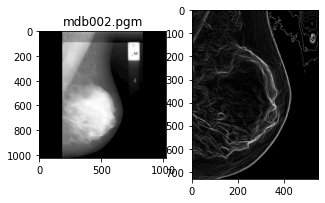

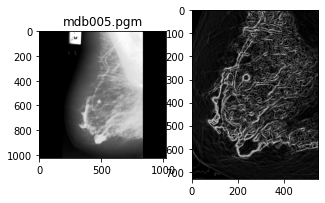

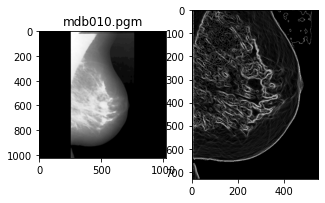

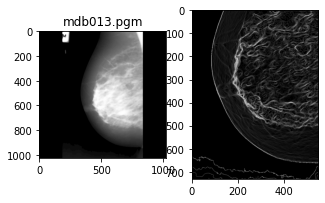

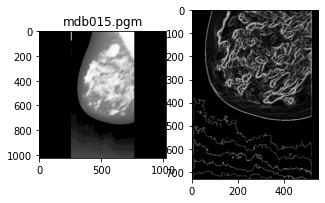

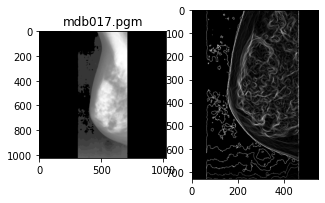

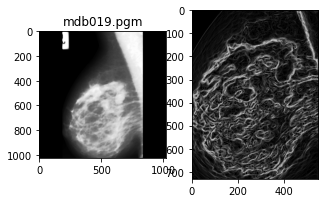

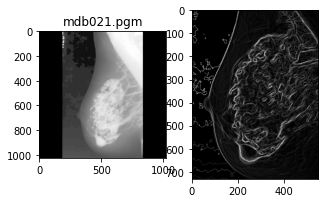

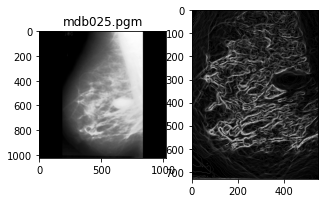

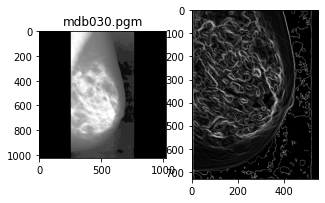

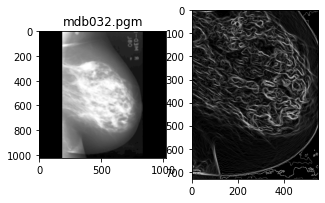

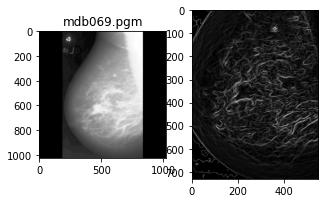

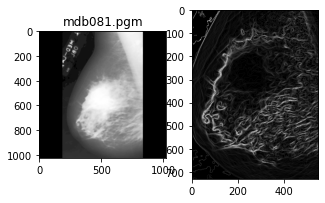

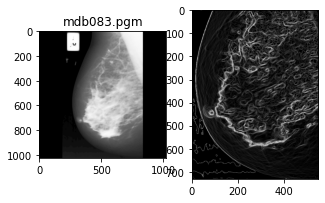

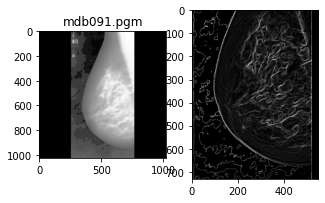

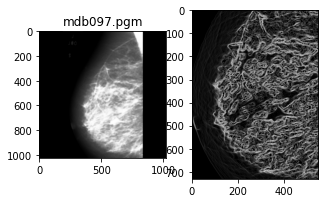

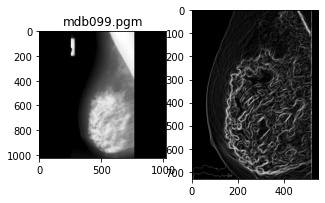

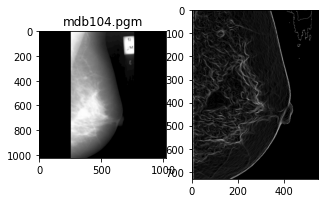

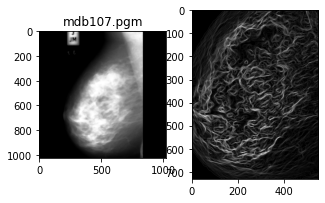

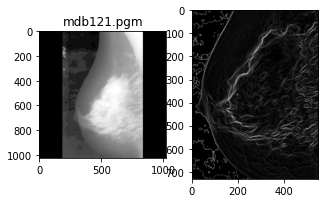

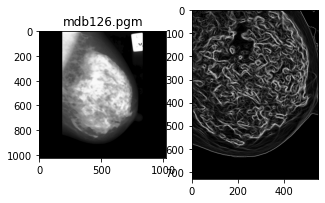

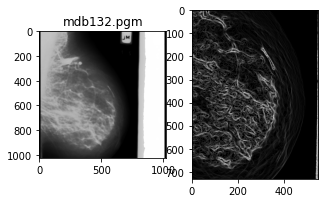

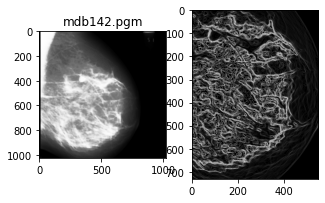

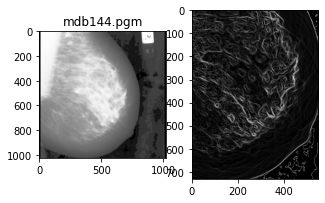

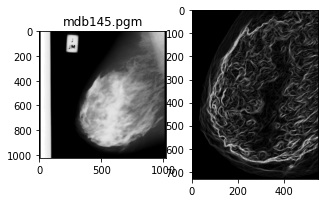

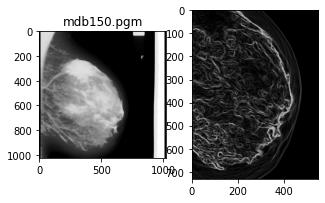

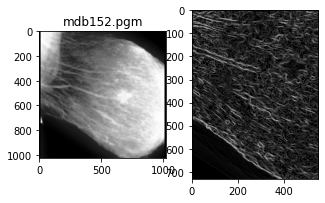

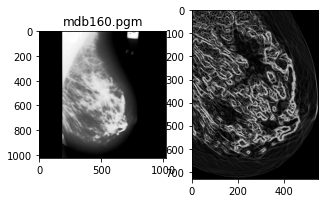

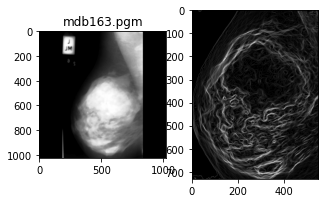

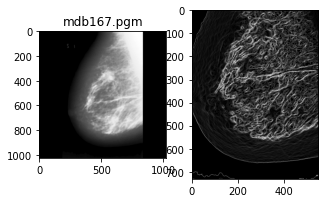

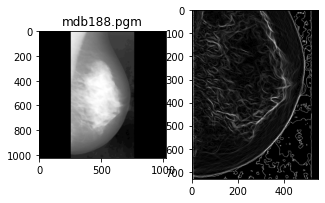

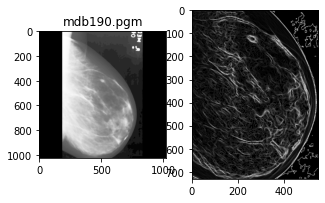

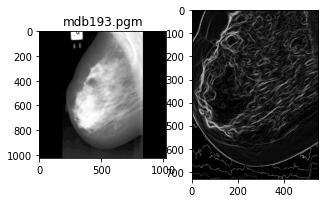

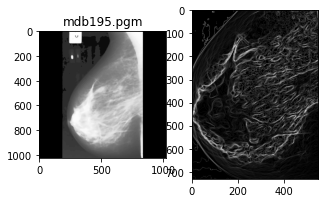

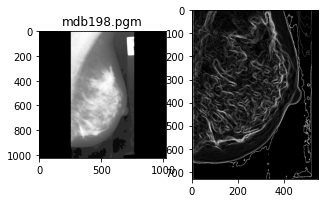

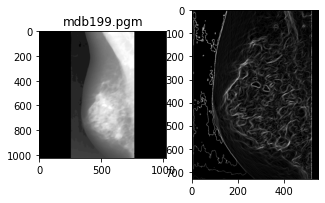

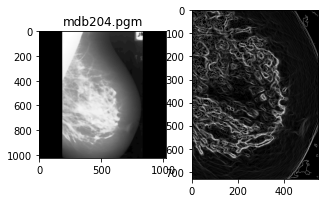

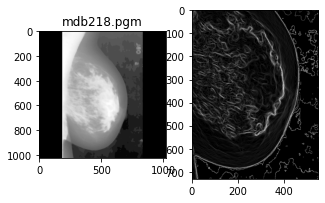

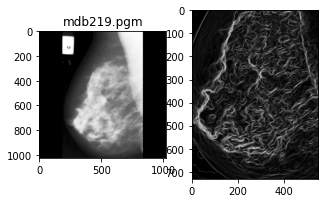

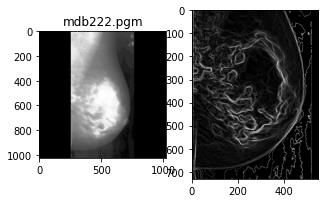

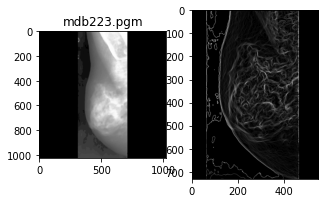

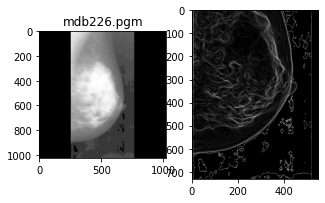

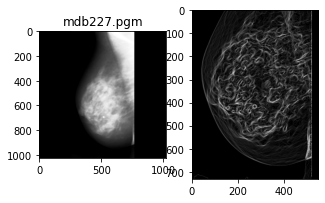

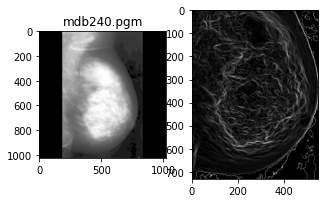

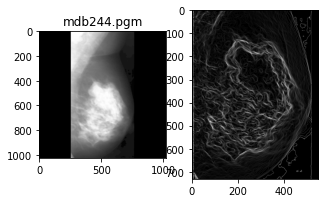

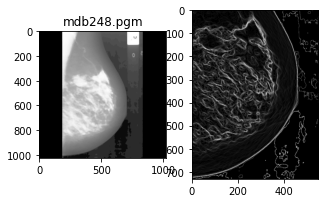

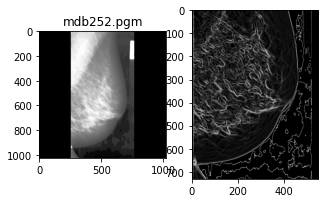

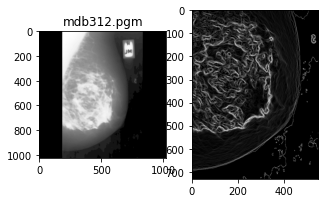

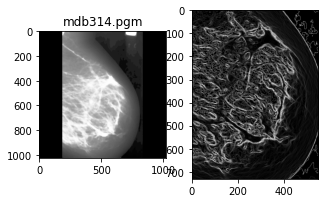

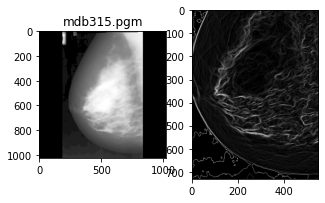

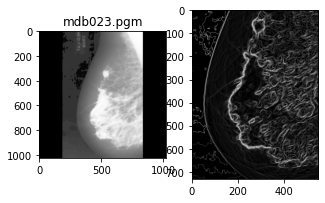

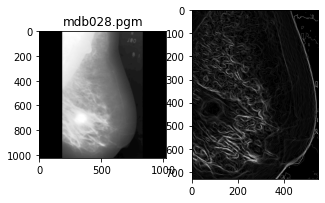

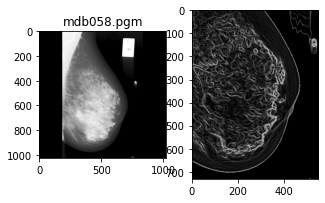

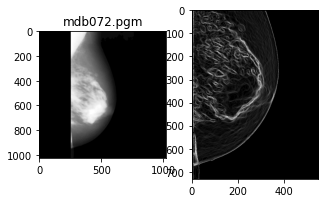

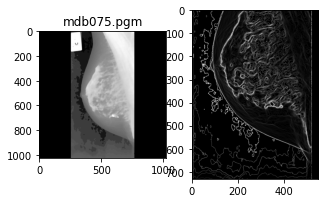

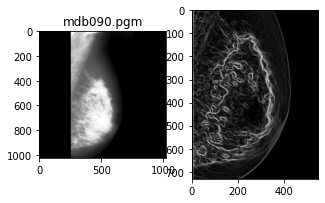

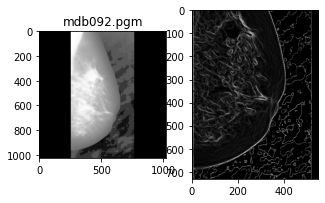

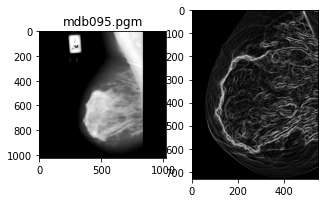

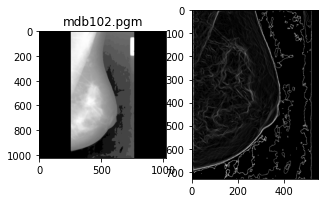

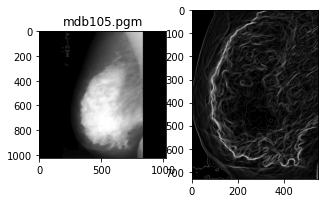

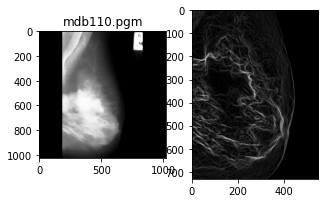

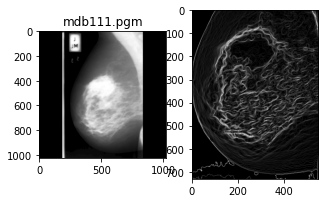

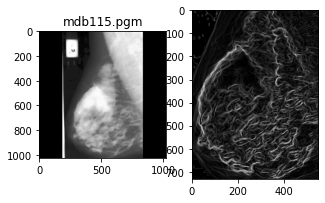

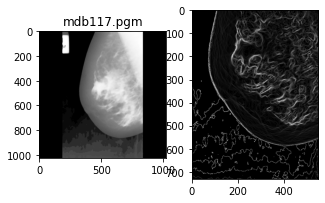

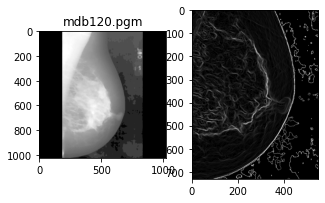

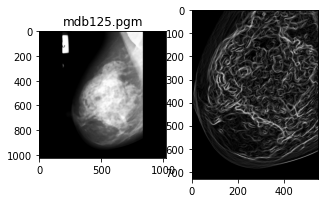

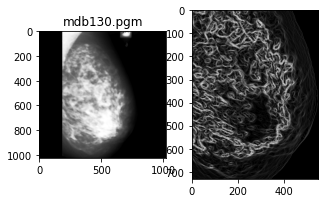

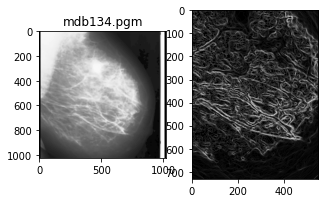

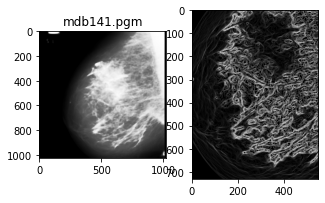

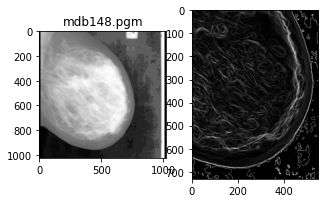

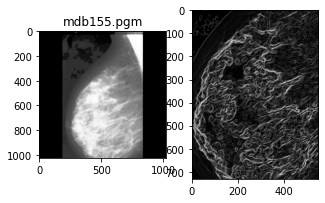

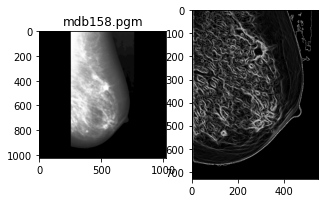

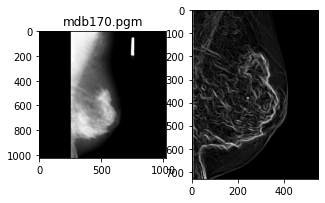

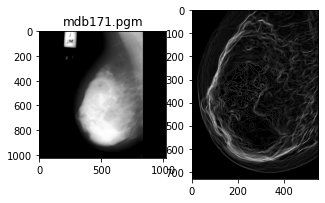

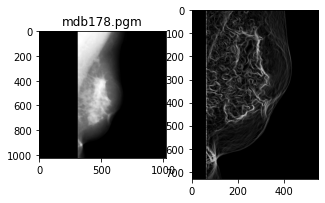

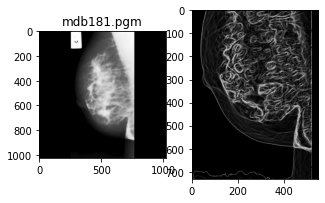

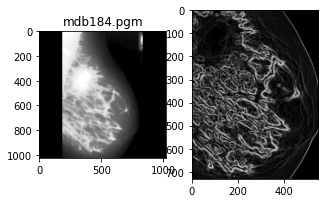

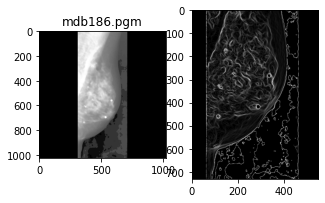

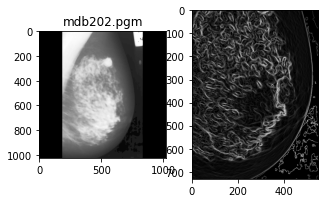

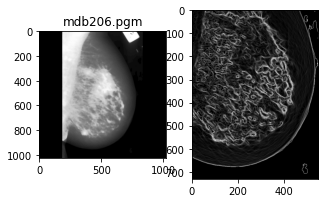

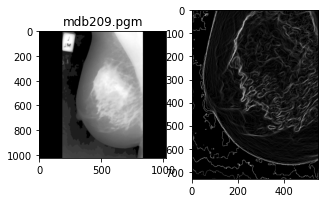

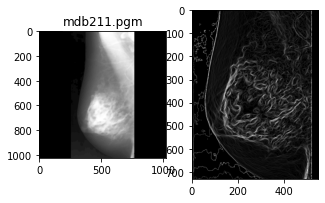

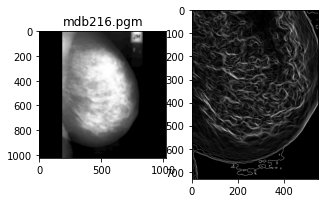

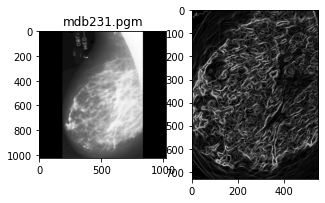

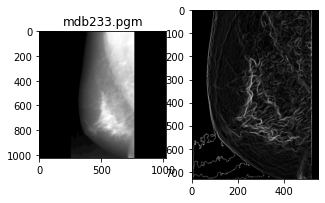

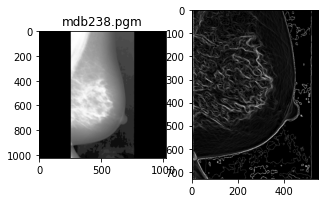

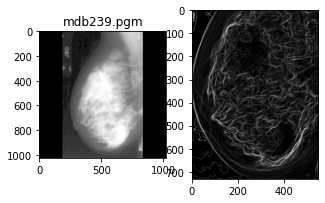

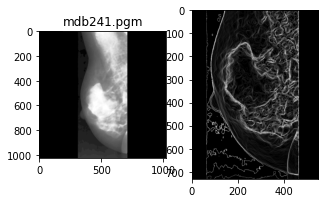

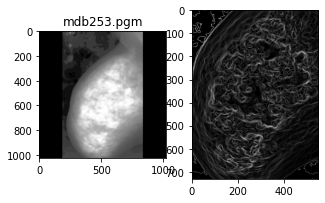

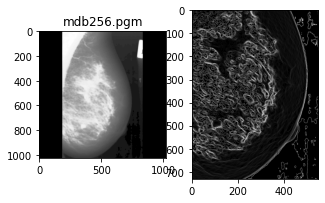

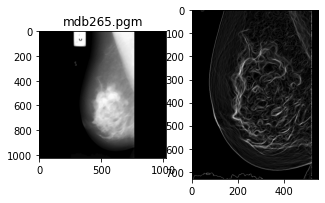

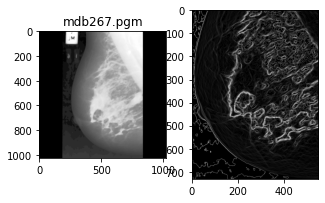

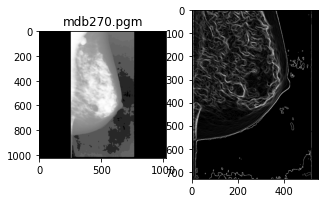

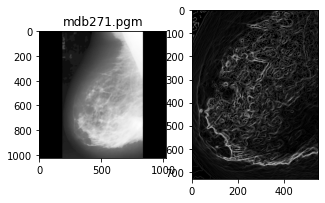

In [433]:
paths=['data/Benign/','data/Malignant/'] #,,'data/normal/'

width,height=550,731
x,y=250,276 #2
for path in paths:
    for i in os.listdir(path):
        img=plt.imread(path+i)
        medianB=cv2.medianBlur(img,11)
        equ = cv2.equalizeHist(medianB)
        
        croped=equ[y:y+height, x:x+width]
        
        roberts_cross_v = np.array( [[1, 0 ],
                                     [0,-1 ]] )
  
        roberts_cross_h = np.array( [[ 0, 1 ],
                                     [ -1, 0 ]] )
        vertical = ndimage.convolve( croped, roberts_cross_v )
        horizontal = ndimage.convolve( croped, roberts_cross_h )
        edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
        
        
        
         #thresh_img=(cv2.threshold(edged_img,110,233,cv2.THRESH_BINARY)[1])
#         edged_img2=cv2.bitwise_and(img,img,mask=thresh_img)
        
#         croped=equ[y:y+height, x:x+width]
        fig,(ax1,ax2) = plt.subplots(1,2,figsize=(5,6))
        ax1.imshow(equ,cmap='gray')
        ax2.imshow(edged_img,cmap='gray')
        ax1.set_title(i)

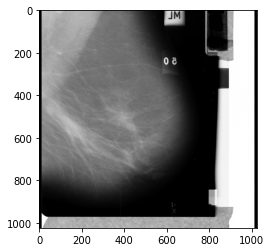

In [119]:
img=plt.imread("/ddsm_project/data/Malignant/mdb274.pgm")
plt.imshow(img[:,:],cmap='gray')

In [102]:
edged_img.max()

15.91

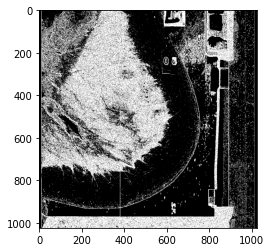

In [106]:
thresh_img=(cv2.threshold(np.float32(edged_img),4,14,cv2.THRESH_BINARY)[1])
plt.imshow(thresh_img,cmap='gray')

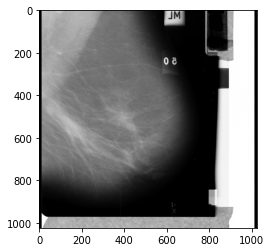

In [40]:
plt.imshow(img,cmap='gray')

In [58]:
croped.max()

15.91

In [85]:
thresh_img=(cv2.threshold(img.astype(np.float32),110,233,cv2.THRESH_BINARY)[1])
# plt.imshow((cv2.bitwise_and(img,img,mask=thresh_img)),cmap='gray')

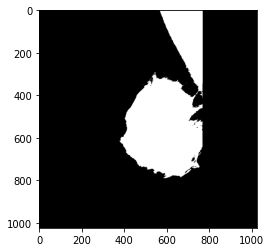

In [87]:
plt.imshow(thresh_img,cmap='gray')

In [70]:
img.dtype

dtype('uint8')

In [233]:
def roberts_cross(img):
    from scipy import ndimage
    roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
    roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
    vertical = ndimage.convolve( equ, roberts_cross_v )
    horizontal = ndimage.convolve( equ, roberts_cross_h )
    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
    
    return edged_img
    

In [ ]:
                                    aaaA

In [ ]:
features=['contrast','energy','homogeneity','dissimilarity']
distances=[4,5,4]
angles=[0,np.pi/4,np.pi/2]
di={}
for i in features:
    for j in range(0,len(angles)):
        for k in range(0,len(distances)):
            col_values=graycoprops(GLCM,i)[j][k]
            col_name=i[:3]+'_'+str(int(np.degrees(angles[j])))+'_'+str(distances[k])
            di.update({col_name:col_values})

In [495]:
features=['contrast','energy','homogeneity','dissimilarity']
distances=[4,5,4]
angles=[0,np.pi/4,np.pi/2]

def GLCM_cal(): 
    width,height=550,731
    x,y=250,276 #2
    features_df=pd.DataFrame()
    paths=['data/Benign/','data/Malignant/'] #,,'data/normal/'
    
    for path in paths:
        for i in os.listdir(path):
            temp=[]
            temp_dic={}
            img=plt.imread(path+i)
            medianB=cv2.medianBlur(img,11)
            equ = cv2.equalizeHist(medianB)
            
            #croped
            croped=equ[y:y+height, x:x+width] 
            #roberts
            roberts_cross_v = np.array( [[1, 0 ],
                                         [0,-1 ]] )
      
            roberts_cross_h = np.array( [[ 0, 1 ],
                                         [ -1, 0 ]] )
            vertical = ndimage.convolve( croped, roberts_cross_v )
            horizontal = ndimage.convolve( croped, roberts_cross_h )
            edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
            edged_img=edged_img.astype(np.uint8)
            ######################
        
            GLCM = graycomatrix(edged_img,distances,angles)
            for n in features:
                for j in range(0,len(angles)):
                    for k in range(0,len(distances)):
                        col_values=graycoprops(GLCM,n)[j][k]
                        col_name=n[:3]+'_'+str(int(np.degrees(angles[j])))+'_'+str(distances[k])
                        temp_dic.update({col_name:col_values})
                
            if path==paths[0]:
                temp_dic.update({"type":0})
            elif path==paths[1]:
                temp_dic.update({"type":1})
            features_df=features_df.append(temp_dic,ignore_index=True)
    return features_df

In [496]:
features_df=GLCM_cal()

C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1203765721.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df=features_df.append(temp_dic,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1203765721.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df=features_df.append(temp_dic,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1203765721.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df=features_df.append(temp_dic,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1203765721.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df=features_df.app

C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1203765721.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df=features_df.append(temp_dic,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1203765721.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df=features_df.append(temp_dic,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1203765721.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df=features_df.append(temp_dic,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1203765721.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df=features_df.app

C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1203765721.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df=features_df.append(temp_dic,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1203765721.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df=features_df.append(temp_dic,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1203765721.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df=features_df.append(temp_dic,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1203765721.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df=features_df.app

In [497]:
features_df.sample(10)

con_0_4    con_0_5   con_45_4   con_45_5   con_90_4   con_90_5  \
15   6.035013   7.430791   6.467966   7.989213   6.035013   7.430791   
41   3.483576   4.816901   3.767638   5.157449   3.483576   4.816901   
59   6.090609   8.032432   6.524315   8.405354   6.090609   8.032432   
73   2.707603   3.239250   3.047012   3.691701   2.707603   3.239250   
4    4.885970   4.914991   5.295239   5.366381   4.885970   4.914991   
91   2.871617   3.577262   3.179624   3.921979   2.871617   3.577262   
14   8.333210   8.787156   9.025607   9.543946   8.333210   8.787156   
90  13.119397  13.072830  13.871215  13.810592  13.119397  13.072830   
13   5.716611   5.915980   6.250188   6.555467   5.716611   5.915980   
53   7.638449   7.331293   8.339161   8.153886   7.638449   7.331293   

     ene_0_4   ene_0_5  ene_45_4  ene_45_5  ...  hom_45_5  hom_90_4  hom_90_5  \
15  0.434268  0.423128  0.428864  0.415173  ...  0.667536  0.698658  0.681345   
41  0.545664  0.534725  0.540200  0.527681  ...  0.737924  0.766312  0.749704   
59  0.526042  0.513898  0.520461  0.506655  ...  0.754359  0.784048  0.765814   
73  0.447734  0.440497  0.442901  0.433833  ...  0.688777  0.709607  0.702425   
4   0.433541  0.430898  0.427903  0.425176  ...  0.669698  0.679488  0.680329   
91  0.414045  0.405335  0.408944  0.398662  ...  0.675042  0.698254  0.687283   
14  0.294673  0.290039  0.288091  0.282468  ...  0.547289  0.569427  0.563443   
90  0.381449  0.379643  0.375362  0.372923  ...  0.590654  0.605966  0.605132   
13  0.281367  0.279584  0.275750  0.272951  ...  0.561110  0.581059  0.577691   
53  0.395866  0.395939  0.389134  0.388806  ...  0.619040  0.627438  0.634299   

     dis_0_4   dis_0_5  dis_45_4  dis_45_5  dis_90_4  dis_90_5  type  
15  1.134055  1.279431  1.194848  1.357065  1.134055  1.279431   0.0  
41  0.767503  0.902056  0.814270  0.958130  0.767503  0.902056   0.0  
59  0.874353  1.049599  0.927375  1.104312  0.874353  1.049599   1.0  
73  0.857214  0.907721  0.913849  0.980655  0.857214  0.907721   1.0  
4   1.131647  1.129754  1.189840  1.194049  1.131647  1.129754   0.0  
91  0.884662  0.962350  0.937661  1.021298  0.884662  0.962350   1.0  
14  1.699532  1.747891  1.789239  1.847804  1.699532  1.747891   0.0  
90  2.015398  2.014836  2.103216  2.108867  2.015398  2.014836   1.0  
13  1.401348  1.426919  1.479399  1.519330  1.401348  1.426919   0.0  
53  1.513302  1.467992  1.602392  1.572179  1.513302  1.467992   1.0  

[10 rows x 25 columns]

In [440]:
features_df.shape

(95, 20)

In [ ]:
width,height=550,731
x,y=250,276 #2
croped=equ[y:y+height, x:x+width]
plt.imshow(croped,cmap='gray')

In [ ]:
thresh = cv2.threshold(equ, 255, 255, cv2.THRESH_BINARY)[1]

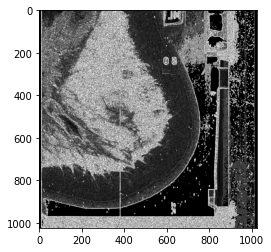

In [107]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
mask = cv2.morphologyEx(edged_img.astype(np.float64), cv2.MORPH_GRADIENT, kernel)
plt.imshow(mask,cmap='gray')

In [ ]:
plt.imshow(result,cmap='gray')

In [ ]:
plt.imshow(img,cmap='gray')

In [8]:
from scipy import ndimage
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
vertical = ndimage.convolve( equ, roberts_cross_v )
horizontal = ndimage.convolve( equ, roberts_cross_h )
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
plt.imshow(edged_img,cmap='gray')

In [ ]:
edged_img.min()

In [ ]:
masked = cv2.bitwise_or(img, img, mask=bw_1)
plt.imshow(masked,cmap='gray')

In [ ]:
edged_img = np.uint8(edged_img)
plt.imshow(cv2.Canny(edged_img,14,12),cmap='gray')


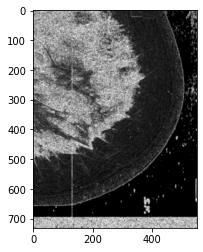

In [12]:
plt.imshow(cv2.GaussianBlur(edged_img.astype(np.float64),(5,5),cv2.IMREAD_UNCHANGED),cmap='gray')

In [ ]:
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobel_y=np.flip(sobel_x.T,axis=0)

In [ ]:
edged_img=edged_img.astype(np.float32)
sobelx=cv2.filter2D(edged_img,-1,sobel_x)
sobely=cv2.filter2D(edged_img,-1,sobel_y)
gradient_magnitude = np.sqrt(np.square(sobelx) + np.square(sobely))
gradient_magnitude *= 255.0 / gradient_magnitude.max()
plt.imshow(gradient_magnitude,cmap='gray')

In [ ]:
gradient_magnitude.dtype

In [ ]:
bw_img = cv2.threshold(gradient_magnitude, 120, 190, cv2.THRESH_BINARY)[1]


In [ ]:
plt.imshow(bw_img,cmap='gray')

In [ ]:
img = plt.imread('data/Malignant/mdb023.pgm')
plt.imshow(dthresh_morph3(img),cmap='gray')

In [ ]:
median = cv2.medianBlur(img, 5)
gauss = cv2.GaussianBlur(img, (3,3), 0)

images = np.concatenate((median, gauss), axis=1)

In [ ]:
plt.imshow(images,cmap='gray')

In [ ]:
img_returned=dthresh_morph2(img,180,190)

In [ ]:
#bw_img = cv2.threshold(img_returned, 170, 190, cv2.THRESH_BINARY)[1]

plt.imshow(img_returned,cmap='gray')

In [ ]:
from scipy.signal import wiener
filtered_img = wiener(img_returned, (3, 3))
plt.imshow(filtered_img,cmap='gray')

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
plt.imshow(clahe.apply(img_returned),cmap='gray')

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(img,cmap='gray')
ax1.set_title("Original")

ax2.imshow(img_returned,cmap='gray')
ax2.set_title("Segmented")

In [ ]:
plt.rcParams['figure.figsize']=(9,8)

### Feature Extraction Gobor

In [ ]:
ksize=3
sigma=12
theta=1*np.pi/3
lamda=1*np.pi/1
gamma =0.5
phi=0

kernal1=cv2.getGaborKernel((ksize,ksize),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
fimg=cv2.filter2D(img_returned,cv2.CV_8UC3,kernal1)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,10))
ax1.imshow(kernal1)

ax2.imshow(fimg,cmap='gray')

In [ ]:
plt.imshow(entropy(img_returned,disk(1)),cmap='gray')

In [ ]:
#plt.imshow(img_returned,cmap='gray')
plt.imshow(entropy(cv2.equalizeHist(img_returned),disk(1)),cmap='gray')

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_returned=clahe.apply(img_returned)

# HOG Feature extraction

In [ ]:
from skimage.feature import hog
from skimage import exposure

In [ ]:
hogfv,hog_image = hog(img_returned,orientations=9,pixels_per_cell=(16,16),cells_per_block=(2,2),visualize=True)
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,5))

In [ ]:
plt.imshow(hog_image,cmap='gray')

In [ ]:
df.loc[df['fileName']=='mdb216']

In [ ]:
type((df.loc[df['fileName']=='mdb216','Y'].iloc[0]))

In [ ]:
s='mdb.pgm'
s.split('.')[0]

## Feature extraction (GLCM)

In [122]:
from skimage.feature import graycomatrix, graycoprops

In [499]:
GLCM= graycomatrix(croped,[1,3,5,4],[0,np.pi/4,np.pi/2,0])
graycoprops(GLCM,'ASM')

array([[0.00798986, 0.00599852, 0.00748375, 0.00798986],
       [0.00411466, 0.00370956, 0.00363308, 0.00411466],
       [0.00281313, 0.00217375, 0.00245171, 0.00281313],
       [0.00333401, 0.00271607, 0.00291369, 0.00333401]])

In [466]:
graycoprops(GLCM,'dissimilarity')

array([[0.74714878, 1.21643836, 0.84022665],
       [2.13144949, 2.37215013, 2.43133117],
       [2.79227111, 3.48015901, 3.19258222]])

In [485]:
features=['contrast','energy','homogeneity','dissimilarity']
distances=[4,5,4]
angles=[0,np.pi/4,np.pi/2]
di={}
for i in features:
    for j in range(0,len(angles)):
        for k in range(0,len(distances)):
            col_values=graycoprops(GLCM,i)[j][k]
            col_name=i[:3]+'_'+str(int(np.degrees(angles[j])))+'_'+str(distances[k])
            di.update({col_name:col_values})
            #print('{}:{}'.format(col_name,col_values))
            
            #print(np.degrees(angles[j]))
            #print(i+'_'+str(int(np.degrees(angles[j])))+'_'+str(distances[j]))
            #graycoprops(GLCM,i)[]
    #         #print(j)
    #          print(i+'_'+ str(int(np.degrees(j)))+'_'+str(distances[j]))
    # #         feature_dis={i+str(j):graycomatrix(GLCM,i)[j][]}

con_0_4:2.773531778958884
con_0_5:5.523841604910532
con_0_4:3.6724607721046065
con_45_4:12.235756783049949
con_45_5:15.741308962382233
con_45_4:18.610442057942052
con_90_4:19.31895190992316
con_90_5:30.42472678144529
con_90_4:29.630686507440295
ene_0_4:0.08938600048958013
ene_0_5:0.07745009606082923
ene_0_4:0.08650869717575733
ene_45_4:0.06414563860373483
ene_45_5:0.06090617820226725
ene_45_4:0.06027502403464261
ene_90_4:0.057740904611913224
ene_90_5:0.052115893182301705
ene_90_4:0.053978611348613224
hom_0_4:0.7797982541369232
hom_0_5:0.670867231397554
hom_0_4:0.7654382579161311
hom_45_4:0.4971446765542257
hom_45_5:0.4739756121276467
hom_45_4:0.4842675918576032
hom_90_4:0.41343189808275077
hom_90_5:0.3579483808232142
hom_90_4:0.40286129659997766
dis_0_4:0.7471487769081459
dis_0_5:1.216438356164386
dis_0_4:0.8402266500622669
dis_45_4:2.131449493193812
dis_45_5:2.3721501306659487
dis_45_4:2.4313311688311727
dis_90_4:2.7922711123805524
dis_90_5:3.4801590091809387
dis_90_4:3.19258221833187

In [486]:
di

{'con_0_4': 3.6724607721046065,
 'con_0_5': 5.523841604910532,
 'con_45_4': 18.610442057942052,
 'con_45_5': 15.741308962382233,
 'con_90_4': 29.630686507440295,
 'con_90_5': 30.42472678144529,
 'ene_0_4': 0.08650869717575733,
 'ene_0_5': 0.07745009606082923,
 'ene_45_4': 0.06027502403464261,
 'ene_45_5': 0.06090617820226725,
 'ene_90_4': 0.053978611348613224,
 'ene_90_5': 0.052115893182301705,
 'hom_0_4': 0.7654382579161311,
 'hom_0_5': 0.670867231397554,
 'hom_45_4': 0.4842675918576032,
 'hom_45_5': 0.4739756121276467,
 'hom_90_4': 0.40286129659997766,
 'hom_90_5': 0.3579483808232142,
 'dis_0_4': 0.8402266500622669,
 'dis_0_5': 1.216438356164386,
 'dis_45_4': 2.4313311688311727,
 'dis_45_5': 2.3721501306659487,
 'dis_90_4': 3.192582218331879,
 'dis_90_5': 3.4801590091809387}

In [ ]:
features=['contrast','energy','homogeneity','dissimilarity'] #'dissimilarity , 'ASM','correlation',
dim_features=['contrast_0','contrast_45','contrast_90','contrast_315','energy_0','energy_45','energy_90','energy_315','homogeneity_0','homogeneity_45','homogeneity_90','homogeneity_315','correlation_0','correlation_45','correlation_90','correlation_315']
#dim_features=['Contrast_0','Contrast_45','Contrast_90','Contrast_135','Dissimilarity_0','Dissimilarity_45','Dissimilarity_90','Dissimilarity_135','Homogeneity_0','Homogeneity_45','Homogeneity_90','Homogeneity_1340','Energy_0','Energy_45','Energy_90','Energy_135','Correlation_0','Correlation_45','Correlation_90','Correlation_135','ASM_0','ASM_45','ASM_90','ASM_135']
#,'correlation_-90','correlation_-45','correlation_45','correlation_90',

def GLCM_cal(upper=157,lower=190): 
    features_df=pd.DataFrame()
    countB=0 
    paths=['data/Benign/','data/Malignant/'] #,,'data/normal/'
    
    for path in paths:
        for i in os.listdir(path):
            temp=[]
            temp_dic={}
            img=plt.imread(path+i)
            df_img=i.split('.')[0]
#             print(df_img)
            x=int(df.loc[df['fileName']==df_img,'X'].iloc[0])
            y=int(df.loc[df['fileName']==df_img,'Y'].iloc[0])
            r=int(df.loc[df['fileName']==df_img,'radius'].iloc[0])
            img_returned=dthresh_morph3(img,upper,lower,x,y,r)
#             
            GLCM = graycomatrix(img_returned,[2],[-np.pi/4,np.pi/4,-np.pi/2,np.pi/2]) #[0,np.pi/4,np.pi/2,7*np.pi/36]
            countB+=1
            for j in features:
                temp.extend(graycoprops(GLCM,j)[0])
            for k in range(0,len(temp)):
                temp_dic.update({dim_features[k]:temp[k]})
                
            if path==paths[0]:
                temp_dic.update({"type":0})
            elif path==paths[1]:
                temp_dic.update({"type":1})
            elif path==paths[2]:
                temp_dic.update({"type":2})
            features_df=features_df.append(temp_dic,ignore_index=True)
        print(countB)
    return features_df,countB

In [ ]:
tempdf,count=GLCM_cal()

In [ ]:
tempdf

In [ ]:
tempdf1=pd.DataFrame()
tempdf1['total_contast']=tempdf['contrast_0']+tempdf['contrast_45']+tempdf['contrast_90']+tempdf['contrast_315']
tempdf1['total_enery']=tempdf['energy_0']+tempdf['energy_45']+tempdf['energy_90']+tempdf['energy_315']
tempdf1['total_homogeneity']=tempdf['homogeneity_0']+tempdf['homogeneity_45']+tempdf['homogeneity_90']+tempdf['homogeneity_315']
tempdf1['total_dissimilarity']=tempdf['correlation_0']+tempdf['correlation_45']+tempdf['correlation_90']+tempdf['correlation_315']
tempdf1['type']=tempdf['type']

In [ ]:
tempdf1

In [ ]:
tempdf1.shape

In [ ]:
sns.set(style="ticks", color_codes=True)

In [ ]:
img=sns.pairplot(tempdf)

In [ ]:
tempdf.describe()

In [ ]:
tempdf

In [ ]:
tempdf.shape
#34862985

In [ ]:
tempdf['type'].value_counts()

In [172]:
X=features_df.iloc[:,:-1]
y=features_df.iloc[:,-1:]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features_df.iloc[:,:-1],features_df.iloc[:,-1:],test_size=0.1,random_state=i) #32

# std=StandardScaler()
# X_train=std.fit_transform(X_train)
# X_test=std.transform(X_test)

In [ ]:
# from sklearn import svm
# from sklearn.tree import DecisionTreeClassifier

# tree=DecisionTreeClassifier(criterion='gini',max_depth=5)
# tree.fit(X_train,y_train)
# y_pred=tree.predict(X_test)

# # lr= LinearRegression
# # clf = svm.SVC(kernel='rbf')
# # clf.fit(X_train, y_train.values.ravel())
# # y_pred = clf.predict(X_test)

In [ ]:
tempdf.shape

In [443]:
X=features_df.iloc[:,:-1]
y=features_df.iloc[:,-1:]

In [501]:
from sklearn.linear_model import LogisticRegression

for i in range(0,80):
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i) #5

    classifier=LogisticRegression()
    classifier.fit(X,y.values.ravel())
    #classifier.fit(X_test,y_test.values.ravel())
    y_pred=classifier.predict(X_test)

    from sklearn import metrics
    from sklearn.metrics import f1_score
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F1:",f1_score(y_test,y_pred,average=None))
    print("Confusion: \n",confusion_matrix(y_test,y_pred))
    print(">>>>>>>>>>>>>>{}>>>>>>>>>>>>>>>>>>>>>".format(i))

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.5789473684210527
F1: [0.66666667 0.42857143]
Confusion: 
 [[8 0]
 [8 3]]
>>>>>>>>>>>>>>0>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1: [0.69230769 0.33333333]
Confusion: 
 [[9 1]
 [7 2]]
>>>>>>>>>>>>>>1>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.7368421052631579
F1: [0.82758621 0.44444444]
Confusion: 
 [[12  0]
 [ 5  2]]
>>>>>>>>>>>>>>2>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.47368421052631576
F1: [0.5        0.44444444]
Confusion: 
 [[5 2]
 [8 4]]
>>>>>>>>>>>>>>3>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.74074074 0.36363636]
Confusion: 
 [[10  1]
 [ 6  2]]
>>>>>>>>>>>>>>4>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.7368421052631579
F1: [0.82758621 0.44444444]
Confusion: 
 [[12  1]
 [ 4  2]]
>>>>>>>>>>>>>>5>>>>>>>>>>>>>>>>>>>>>


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.7894736842105263
F1: [0.8        0.77777778]
Confusion: 
 [[8 2]
 [2 7]]
>>>>>>>>>>>>>>6>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.7368421052631579
F1: [0.81481481 0.54545455]
Confusion: 
 [[11  1]
 [ 4  3]]
>>>>>>>>>>>>>>7>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.7368421052631579
F1: [0.8        0.61538462]
Confusion: 
 [[10  1]
 [ 4  4]]
>>>>>>>>>>>>>>8>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.64       0.30769231]
Confusion: 
 [[8 5]
 [4 2]]
>>>>>>>>>>>>>>9>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1: [0.69230769 0.33333333]
Confusion: 
 [[9 1]
 [7 2]]
>>>>>>>>>>>>>>10>>>>>>>>>>>>>>>>>>>>>


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.5789473684210527
F1: [0.63636364 0.5       ]
Confusion: 
 [[7 2]
 [6 4]]
>>>>>>>>>>>>>>11>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.74074074 0.36363636]
Confusion: 
 [[10  1]
 [ 6  2]]
>>>>>>>>>>>>>>12>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1: [0.69230769 0.33333333]
Confusion: 
 [[9 2]
 [6 2]]
>>>>>>>>>>>>>>13>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.60869565 0.4       ]
Confusion: 
 [[7 3]
 [6 3]]
>>>>>>>>>>>>>>14>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.69565217 0.53333333]
Confusion: 
 [[8 0]
 [7 4]]
>>>>>>>>>>>>>>15>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.8125 0.    ]
Confusion: 
 [[13  0]
 [ 6  0]]
>>>>>>>>>>>>>>16>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.8  0.25]
Confusion: 
 [[12  1]
 [ 5  1]]
>>>>>>>>>>>>>>17>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.47368421052631576
F1: [0.61538462 0.16666667]
Confusion: 
 [[8 4]
 [6 1]]
>>>>>>>>>>>>>>18>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.5263157894736842
F1: [0.66666667 0.18181818]
Confusion: 
 [[9 0]
 [9 1]]
>>>>>>>>>>>>>>20>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.78571429 0.4       ]
Confusion: 
 [[11  1]
 [ 5  2]]
>>>>>>>>>>>>>>21>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1: [0.69230769 0.33333333]
Confusion: 
 [[9 1]
 [7 2]]
>>>>>>>>>>>>>>22>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.75       0.57142857]
Confusion: 
 [[9 2]
 [4 4]]
>>>>>>>>>>>>>>23>>>>>>>>>>>>>>>>>>>>>


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.631578947368421
F1: [0.72       0.46153846]
Confusion: 
 [[9 1]
 [6 3]]
>>>>>>>>>>>>>>24>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.52631579 0.52631579]
Confusion: 
 [[5 1]
 [8 5]]
>>>>>>>>>>>>>>25>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.7368421052631579
F1: [0.8        0.61538462]
Confusion: 
 [[10  2]
 [ 3  4]]
>>>>>>>>>>>>>>26>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.42105263157894735
F1: [0.56       0.15384615]
Confusion: 
 [[ 7  1]
 [10  1]]
>>>>>>>>>>>>>>27>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1: [0.66666667 0.42857143]
Confusion: 
 [[8 1]
 [7 3]]
>>>>>>>>>>>>>>28>>>>>>>>>>>>>>>>>>>>>


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.7368421052631579
F1: [0.8        0.61538462]
Confusion: 
 [[10  1]
 [ 4  4]]
>>>>>>>>>>>>>>29>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.47368421052631576
F1: [0.54545455 0.375     ]
Confusion: 
 [[6 2]
 [8 3]]
>>>>>>>>>>>>>>30>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.78571429 0.4       ]
Confusion: 
 [[11  0]
 [ 6  2]]
>>>>>>>>>>>>>>31>>>>>>>>>>>>>>>>>>>>>


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.631578947368421
F1: [0.77419355 0.        ]
Confusion: 
 [[12  1]
 [ 6  0]]
>>>>>>>>>>>>>>32>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.3684210526315789
F1: [0.4        0.33333333]
Confusion: 
 [[4 4]
 [8 3]]
>>>>>>>>>>>>>>33>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.64       0.30769231]
Confusion: 
 [[8 2]
 [7 2]]
>>>>>>>>>>>>>>34>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.78571429 0.4       ]
Confusion: 
 [[11  1]
 [ 5  2]]
>>>>>>>>>>>>>>35>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.47368421052631576
F1: [0.64285714 0.        ]


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Confusion: 
 [[9 2]
 [8 0]]
>>>>>>>>>>>>>>36>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.66666667 0.58823529]
Confusion: 
 [[7 1]
 [6 5]]
>>>>>>>>>>>>>>37>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.66666667 0.18181818]
Confusion: 
 [[9 2]
 [7 1]]
>>>>>>>>>>>>>>38>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.76923077 0.5       ]
Confusion: 
 [[10  0]
 [ 6  3]]
>>>>>>>>>>>>>>39>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1: [0.69230769 0.33333333]
Confusion: 
 [[9 2]
 [6 2]]
>>>>>>>>>>>>>>40>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.47368421052631576
F1: [0.61538462 0.16666667]
Confusion: 
 [[8 2]
 [8 1]]
>>>>>>>>>>>>>>41>>>>>>>>>>>>>>>>>>>>>


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.6842105263157895
F1: [0.78571429 0.4       ]
Confusion: 
 [[11  2]
 [ 4  2]]
>>>>>>>>>>>>>>42>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1: [0.66666667 0.42857143]
Confusion: 
 [[8 3]
 [5 3]]
>>>>>>>>>>>>>>43>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.66666667 0.18181818]
Confusion: 
 [[9 1]
 [8 1]]
>>>>>>>>>>>>>>44>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.66666667 0.18181818]
Confusion: 
 [[9 2]
 [7 1]]
>>>>>>>>>>>>>>45>>>>>>>>>>>>>>>>>>>>>


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.631578947368421
F1: [0.75862069 0.22222222]
Confusion: 
 [[11  2]
 [ 5  1]]
>>>>>>>>>>>>>>46>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1: [0.66666667 0.42857143]
Confusion: 
 [[8 1]
 [7 3]]
>>>>>>>>>>>>>>47>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.69565217 0.53333333]
Confusion: 
 [[8 0]
 [7 4]]
>>>>>>>>>>>>>>48>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1: [0.66666667 0.42857143]
Confusion: 
 [[8 2]
 [6 3]]
>>>>>>>>>>>>>>49>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.78571429 0.4       ]
Confusion: 
 [[11  0]
 [ 6  2]]
>>>>>>>>>>>>>>50>>>>>>>>>>>>>>>>>>>>>


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.42105263157894735
F1: [0.52173913 0.26666667]
Confusion: 
 [[6 2]
 [9 2]]
>>>>>>>>>>>>>>51>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.66666667 0.18181818]
Confusion: 
 [[9 1]
 [8 1]]
>>>>>>>>>>>>>>52>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.74074074 0.36363636]
Confusion: 
 [[10  0]
 [ 7  2]]
>>>>>>>>>>>>>>53>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.47368421052631576
F1: [0.61538462 0.16666667]
Confusion: 
 [[ 8  0]
 [10  1]]
>>>>>>>>>>>>>>54>>>>>>>>>>>>>>>>>>>>>


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.47368421052631576
F1: [0.61538462 0.16666667]
Confusion: 
 [[8 4]
 [6 1]]
>>>>>>>>>>>>>>55>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.66666667 0.18181818]
Confusion: 
 [[9 3]
 [6 1]]
>>>>>>>>>>>>>>56>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.66666667 0.58823529]
Confusion: 
 [[7 2]
 [5 5]]
>>>>>>>>>>>>>>57>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.69565217 0.53333333]
Confusion: 
 [[8 3]
 [4 4]]
>>>>>>>>>>>>>>58>>>>>>>>>>>>>>>>>>>>>


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.5789473684210527
F1: [0.73333333 0.        ]
Confusion: 
 [[11  0]
 [ 8  0]]
>>>>>>>>>>>>>>59>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.66666667 0.18181818]
Confusion: 
 [[9 2]
 [7 1]]
>>>>>>>>>>>>>>60>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.76923077 0.5       ]
Confusion: 
 [[10  1]
 [ 5  3]]
>>>>>>>>>>>>>>61>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.3684210526315789
F1: [0.4        0.33333333]
Confusion: 
 [[4 3]
 [9 3]]
>>>>>>>>>>>>>>62>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.72       0.46153846]
Confusion: 
 [[9 1]
 [6 3]]
>>>>>>>>>>>>>>63>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1:

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

 [0.73333333 0.        ]
Confusion: 
 [[11  2]
 [ 6  0]]
>>>>>>>>>>>>>>64>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.64       0.30769231]
Confusion: 
 [[8 0]
 [9 2]]
>>>>>>>>>>>>>>65>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.64       0.30769231]
Confusion: 
 [[8 0]
 [9 2]]
>>>>>>>>>>>>>>66>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.66666667 0.18181818]
Confusion: 
 [[9 2]
 [7 1]]
>>>>>>>>>>>>>>67>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.64       0.30769231]
Confusion: 
 [[8 0]
 [9 2]]
>>>>>>>>>>>>>>68>>>>>>>>>>>>>>>>>>>>>


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy: 0.6842105263157895
F1: [0.78571429 0.4       ]
Confusion: 
 [[11  1]
 [ 5  2]]
>>>>>>>>>>>>>>69>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.78571429 0.4       ]
Confusion: 
 [[11  2]
 [ 4  2]]
>>>>>>>>>>>>>>70>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.3684210526315789
F1: [0.5        0.14285714]
Confusion: 
 [[ 6  2]
 [10  1]]
>>>>>>>>>>>>>>71>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.74074074 0.36363636]
Confusion: 
 [[10  1]
 [ 6  2]]
>>>>>>>>>>>>>>72>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.7        0.66666667]
Confusion: 
 [[7 1]
 [5 6]]
>>>>>>>>>>>>>>73>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.69565217 0.53333333]
Confusion: 
 [[8 2]
 [5 4]]
>>>>>>>>>>>>>>74>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.8125 0.    ]
Confusion: 
 [[13  2]
 [ 4  0]]
>>>>>>>>>>>>>>75>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1: [0.69230769 0.33333333]
Confusion: 
 [[9 2]
 [6 2]]
>>>>>>>>>>>>>>76>>>>>>>>>>>>>>>>>>>>>
Accura

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [500]:
from sklearn.svm import SVC

for i in range(0,80):
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i) #32

    classifier=SVC(kernel='rbf')
    classifier.fit(X,y.values.ravel())
    #classifier.fit(X_test,y_test.values.ravel())
    y_pred=classifier.predict(X_test)

    from sklearn import metrics
    from sklearn.metrics import f1_score
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F1:",f1_score(y_test,y_pred,average=None))
    print("Confusion: \n",confusion_matrix(y_test,y_pred))
    print(">>>>>>>>>>>>>>{}>>>>>>>>>>>>>>>>>>>>>".format(i))

Accuracy: 0.42105263157894735
F1: [0.59259259 0.        ]
Confusion: 
 [[ 8  0]
 [11  0]]
>>>>>>>>>>>>>>0>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1: [0.71428571 0.2       ]
Confusion: 
 [[10  0]
 [ 8  1]]
>>>>>>>>>>>>>>1>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.8  0.25]
Confusion: 
 [[12  0]
 [ 6  1]]
>>>>>>>>>>>>>>2>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.47368421052631576
F1: [0.58333333 0.28571429]
Confusion: 
 [[ 7  0]
 [10  2]]
>>>>>>>>>>>>>>3>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.75862069 0.22222222]
Confusion: 
 [[11  0]
 [ 7  1]]
>>>>>>>>>>>>>>4>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.8125 0.    ]
Confusion: 
 [[13  0]
 [ 6  0]]
>>>>>>>>>>>>>>5>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.74074074 0.36363636]
Confusion: 
 [[10  0]
 [ 7  2]]
>>>>>>>>>>>>>>6>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.8  0.25]
Confusion: 
 [[12  0]
 [ 6  1]]
>>>>>>>>>>>>>>7>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368

Accuracy: 0.47368421052631576
F1: [0.61538462 0.16666667]
Confusion: 
 [[ 8  0]
 [10  1]]
>>>>>>>>>>>>>>71>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.75862069 0.22222222]
Confusion: 
 [[11  0]
 [ 7  1]]
>>>>>>>>>>>>>>72>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.47368421052631576
F1: [0.61538462 0.16666667]
Confusion: 
 [[ 8  0]
 [10  1]]
>>>>>>>>>>>>>>73>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.631578947368421
F1: [0.74074074 0.36363636]
Confusion: 
 [[10  0]
 [ 7  2]]
>>>>>>>>>>>>>>74>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.7894736842105263
F1: [0.88235294 0.        ]
Confusion: 
 [[15  0]
 [ 4  0]]
>>>>>>>>>>>>>>75>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5789473684210527
F1: [0.73333333 0.        ]
Confusion: 
 [[11  0]
 [ 8  0]]
>>>>>>>>>>>>>>76>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.5263157894736842
F1: [0.68965517 0.        ]
Confusion: 
 [[10  0]
 [ 9  0]]
>>>>>>>>>>>>>>77>>>>>>>>>>>>>>>>>>>>>
Accuracy: 0.6842105263157895
F1: [0.8  0.25]
Confusion: 
 [[12  0]
 [ 6  1]]
>>>>>>>>>>>>>>78>>>>>>>>>>>>>>>>>>

In [146]:
import statsmodels.api as sm


In [220]:
result = sm.OLS(y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   type   R-squared (uncentered):                   0.534
Model:                            OLS   Adj. R-squared (uncentered):              0.503
Method:                 Least Squares   F-statistic:                              17.00
Date:                Tue, 14 Jun 2022   Prob (F-statistic):                    5.49e-13
Time:                        00:11:42   Log-Likelihood:                         -61.971
No. Observations:                  95   AIC:                                      135.9
Df Residuals:                      89   BIC:                                      151.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [219]:
X=X[[  'contrast_45',  'energy_0',
        'energy_90', 'homogeneity_0',
       'homogeneity_45', 'homogeneity_315']]

In [ ]:
X=tempdf[[ 'contrast_90', 'contrast_315', 'correlation_0']]

In [218]:
X=features_df[['contrast_45', 'energy_0',
     'energy_90', 'homogeneity_0',
       'homogeneity_45', 'homogeneity_90', 'homogeneity_315']]

In [ ]:
#X=tempdf1.iloc[:,:]

#X = sm.add_constant(X)
result = sm.OLS(y, tempdf1).fit()
print(result.summary())

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",f1_score(y_test,y_pred,average=None))
print("Confusion: \n",confusion_matrix(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=150)
randomforest.fit(X_train,y_train)
y_pred=randomforest.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor

In [ ]:
clf= LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
reg=LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions=clf.fit(X_train,X_test,y_train,y_test)
#models.predictions=clf.fit(X_train,X_test,y_train,y_test)

In [ ]:
pd.DataFrame(models)

In [225]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [226]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5) 

In [227]:
X_train.shape

(76, 6)

In [228]:
model = Sequential([
    Dense(32, activation='relu',input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [229]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [231]:
hist = model.fit(X_train, y_train.values.ravel(),
           epochs=1000,
          )

Epoch 1/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6896 - accuracy: 0.5395
Epoch 2/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.7923 - accuracy: 0.5658
Epoch 3/1000
3/3 [==============================] - 0s 0s/step - loss: 0.7903 - accuracy: 0.5395
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.8100 - accuracy: 0.4737
Epoch 5/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.9435 - accuracy: 0.5000
Epoch 6/1000
3/3 [==============================] - 0s 0s/step - loss: 0.7095 - accuracy: 0.5263
Epoch 7/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.7560 - accuracy: 0.5395
Epoch 8/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.7690 - accuracy: 0.5263
Epoch 9/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.7244 - accuracy: 0.4868
Epoch 10/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6958 - accuracy: 0.5132
Epoch 11/1000
3/3 [==

3/3 [==============================] - 0s 0s/step - loss: 0.7021 - accuracy: 0.4737
Epoch 167/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6850 - accuracy: 0.5395
Epoch 168/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6771 - accuracy: 0.5526
Epoch 169/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.7215 - accuracy: 0.5132
Epoch 170/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6970 - accuracy: 0.4868
Epoch 171/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 172/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6841 - accuracy: 0.5789
Epoch 173/1000
3/3 [==============================] - 0s 0s/step - loss: 0.7270 - accuracy: 0.5526
Epoch 174/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6994 - accuracy: 0.5395
Epoch 175/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.7114 - accuracy: 0.5263
Epoch 176/1000
3/

3/3 [==============================] - 0s 8ms/step - loss: 0.6965 - accuracy: 0.5526
Epoch 331/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6860 - accuracy: 0.5132
Epoch 332/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6954 - accuracy: 0.4868
Epoch 333/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6834 - accuracy: 0.5395
Epoch 334/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6793 - accuracy: 0.5658
Epoch 335/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6879 - accuracy: 0.5526
Epoch 336/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6862 - accuracy: 0.5132
Epoch 337/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6776 - accuracy: 0.6053
Epoch 338/1000
3/3 [==============================] - 0s 0s/step - loss: 0.7213 - accuracy: 0.5132
Epoch 339/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6821 - accuracy: 0.5658
Epoch 340/1000
3/3 [

3/3 [==============================] - 0s 0s/step - loss: 0.6819 - accuracy: 0.5132
Epoch 495/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6802 - accuracy: 0.5658
Epoch 496/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6814 - accuracy: 0.5526
Epoch 497/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6829 - accuracy: 0.5789
Epoch 498/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6830 - accuracy: 0.5658
Epoch 499/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6771 - accuracy: 0.5789
Epoch 500/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6831 - accuracy: 0.5132
Epoch 501/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6835 - accuracy: 0.5526
Epoch 502/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.7077 - accuracy: 0.5526
Epoch 503/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6944 - accuracy: 0.5395
Epoch 504/1000
3/3 

3/3 [==============================] - 0s 0s/step - loss: 0.6845 - accuracy: 0.5526
Epoch 659/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6734 - accuracy: 0.5658
Epoch 660/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6948 - accuracy: 0.5395
Epoch 661/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6868 - accuracy: 0.5395
Epoch 662/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5132
Epoch 663/1000
3/3 [==============================] - 0s 0s/step - loss: 0.7024 - accuracy: 0.5395
Epoch 664/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6775 - accuracy: 0.5000
Epoch 665/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6855 - accuracy: 0.5658
Epoch 666/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6897 - accuracy: 0.5263
Epoch 667/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6826 - accuracy: 0.5000
Epoch 668/1000
3/3 [====

3/3 [==============================] - 0s 8ms/step - loss: 0.7050 - accuracy: 0.5263
Epoch 823/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6796 - accuracy: 0.5526
Epoch 824/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6795 - accuracy: 0.5658
Epoch 825/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6772 - accuracy: 0.5395
Epoch 826/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6823 - accuracy: 0.5000
Epoch 827/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6816 - accuracy: 0.5526
Epoch 828/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6799 - accuracy: 0.5526
Epoch 829/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6835 - accuracy: 0.5658
Epoch 830/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6891 - accuracy: 0.5395
Epoch 831/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6923 - accuracy: 0.5132
Epoch 832/1000
3/3 [

3/3 [==============================] - 0s 0s/step - loss: 0.7058 - accuracy: 0.5526
Epoch 987/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6686 - accuracy: 0.5263
Epoch 988/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.7159 - accuracy: 0.5263
Epoch 989/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.7006 - accuracy: 0.5263
Epoch 990/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6900 - accuracy: 0.5263
Epoch 991/1000
3/3 [==============================] - 0s 0s/step - loss: 0.7150 - accuracy: 0.5263
Epoch 992/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6887 - accuracy: 0.5395
Epoch 993/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6813 - accuracy: 0.5526
Epoch 994/1000
3/3 [==============================] - 0s 0s/step - loss: 0.6914 - accuracy: 0.5132
Epoch 995/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.5789
Epoch 996/1000
3/3 [==

In [ ]:
model.evaluate(X_train, y_train)[1]

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten